In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [47]:
path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_17Z.txt'
dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])

In [57]:
np.unique(dic['initiation_time'])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 99.9])

In [ ]:
# initiation time missing: 99.9 , xinit: -99, 

In [60]:
np.unique(dic['initiation_time'][dic['i_initiation']==-99])

array([ 2. , 99.9])

In [65]:
np.unique(dic['i_initiation'][dic['initiation_time']==99.9])

array([-99])

In [19]:
np.unique(dic['i_core'])

array([255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 43

In [31]:
init = dic['initiation_time']

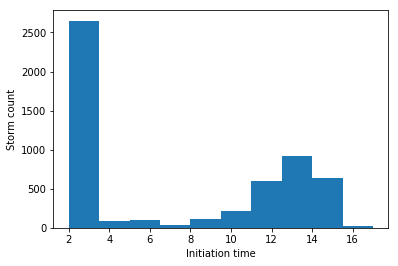

In [32]:
f = plt.figure()
plt.hist(init, range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number_new.jpg')

In [27]:
np.sum(init>13)

1052

In [28]:
np.sum(init<=6)

2840

In [3]:
def merge_tab(h):
    outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/'
    msgopen = pd.read_csv(outpath + 'cores_gt15000km2_table_AMSRE_tracking_'+str(h)+'.csv')
    path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_'+str(h)+'Z.txt'
    dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])
    msgopen['initTime'] = np.nan
    msgopen['xinit'] = np.nan
    msgopen['yinit'] = np.nan
    msgopen['xdiff']= np.nan
    for dids, dit in msgopen.iterrows():
        ddic = dic[(dic['i_core']==dit['xloc']) & (dic['j_core']==dit['yloc']) & (dic['year']==dit['year']) & (dic['mon']==dit['month'])  & (dic['day']== dit['day'])]
        msgopen['initTime'] = dic['initiation_time']
        msgopen['xinit'] = dic['i_initiation']
        msgopen['yinit'] = dic['j_initiation']
        msgopen['xdiff'] = dic['i_initiation']-dic['i_core']
    #msgopen = msgopen[(msgopen['initTime']!= 99.9)& (msgopen['xinit'] != -99)]
    #ipdb.set_trace()
    msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_" + str(h) + "_init.csv", na_rep=-999, index_label='id')

In [4]:
merge_tab(17)

In [140]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_tracking_17.csv')

In [141]:
# outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/'
# h=17
# msgopen = msgopen[(msgopen['initTime']!= 99.9)& (msgopen['xinit'] != -99)]
# msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_" + str(h) + ".csv", na_rep=-999, index_label='id')

In [151]:
msgopen = msgopen[(msgopen['SMmean0']!= -999)& (msgopen['SMmean-1'] != -999) ]#& (msgopen['SMmean'] != -999)]

In [152]:
msgopen.head()

,id,year,month,day,hour,lon,lat,xloc,yloc,area,csize,t,storm_id,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1
4,4,2006,6,1,17,9.717946,11.432437,957,272,46200,34.0,-76.449956,3,-2.362401,1.0,0.0,-3.168604,1.0,0.0
5,5,2006,6,1,17,9.628114,11.609619,953,278,46200,15.0,-78.000000,3,-1.922428,1.0,0.0,-3.527088,1.0,0.0
6,6,2006,6,1,17,10.122188,11.742431,970,283,46200,20.0,-84.702574,3,-2.031933,1.0,0.0,-3.341359,1.0,0.0
7,7,2006,6,1,17,10.885756,11.919413,997,289,46200,38.0,-75.000000,3,-1.734791,1.0,0.0,-2.434631,1.0,0.0
8,8,2006,6,1,17,11.065419,12.007860,1003,292,46200,15.0,-73.039642,3,-1.549473,1.0,0.0,-1.997073,1.0,0.0


In [139]:
msgopen = msgopen[(msgopen['SMdry0']== 1)& (msgopen['SMdry-1']== 1) & ((msgopen['SMmean0']== -999) |  (msgopen['SMmean-1']== -999))] 

,id,year,month,day,hour,lon,lat,xloc,yloc,area,csize,t,storm_id,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1
4,4,2006,6,1,17,9.717946,11.432437,957,272,46200,34.0,-76.449956,3,-999.000000,1.0,0.0,-3.451439,1.0,0.0
5,5,2006,6,1,17,9.628114,11.609619,953,278,46200,15.0,-78.000000,3,-999.000000,1.0,0.0,-4.022110,1.0,0.0
12,12,2006,6,2,17,-0.882174,9.030164,575,187,15000,15.0,-75.000000,8,-999.000000,1.0,0.0,-4.139150,1.0,0.0
16,16,2006,6,2,17,-0.567764,9.565561,586,206,15000,15.0,-89.416773,8,-999.000000,1.0,0.0,-4.073038,1.0,0.0
17,17,2006,6,2,17,-0.702511,9.743840,581,212,15000,15.0,-89.558723,8,-999.000000,1.0,0.0,-4.116375,1.0,0.0
72,72,2006,6,7,17,-5.463582,9.520977,408,204,205650,15.0,-78.910379,2,-999.000000,1.0,0.0,-3.926396,1.0,0.0
73,73,2006,6,7,17,-5.283919,9.610140,415,207,205650,34.0,-80.872797,2,-999.000000,1.0,0.0,-3.679223,1.0,0.0
74,74,2006,6,7,17,-5.373751,10.011076,412,222,205650,15.0,-82.591884,2,-999.000000,1.0,0.0,-3.024637,1.0,0.0
139,139,2006,6,14,17,7.561989,10.455972,881,237,148275,15.0,-84.980758,5,-999.000000,1.0,0.0,-999.000000,1.0,0.0
163,163,2006,6,16,17,7.472158,10.278089,878,231,25150,17.0,-72.927998,2,-999.000000,1.0,0.0,-999.000000,1.0,0.0


(array([  1.,   1.,   0.,   4.,   7.,   4.,   8.,  16.,  23.,  46., 105.,
        270., 414., 654., 759., 471., 119.,  45.,  16.,   8.]),
 array([-1.97045205e+01, -1.83913066e+01, -1.70780927e+01, -1.57648787e+01,
        -1.44516648e+01, -1.31384509e+01, -1.18252369e+01, -1.05120230e+01,
        -9.19880907e+00, -7.88559513e+00, -6.57238120e+00, -5.25916727e+00,
        -3.94595333e+00, -2.63273940e+00, -1.31952546e+00, -6.31152838e-03,
         1.30690241e+00,  2.62011634e+00,  3.93333027e+00,  5.24654421e+00,
         6.55975814e+00]),
 <a list of 20 Patch objects>)

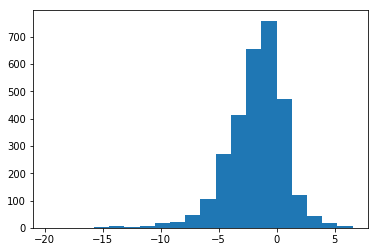

In [159]:
plt.hist(msgopen['SMmean0'], bins=20)

(array([  1.,   0.,   0.,   3.,   0.,   3.,   2.,   8.,  10.,  53., 161.,
        448., 904., 791., 376., 120.,  50.,  33.,   5.,   3.]),
 array([-21.85512346, -20.19758733, -18.5400512 , -16.88251508,
        -15.22497895, -13.56744282, -11.9099067 , -10.25237057,
         -8.59483444,  -6.93729831,  -5.27976219,  -3.62222606,
         -1.96468993,  -0.30715381,   1.35038232,   3.00791845,
          4.66545457,   6.3229907 ,   7.98052683,   9.63806295,
         11.29559908]),
 <a list of 20 Patch objects>)

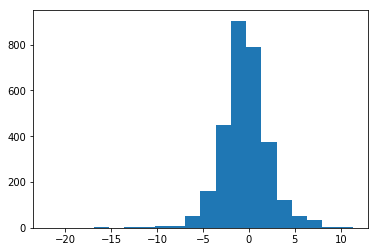

In [158]:
plt.hist(msgopen['SMmean-1'], bins=20)

In [155]:
np.percentile(msgopen['SMmean-1'],[25,75])

array([-1.84988145,  0.96899393])

In [156]:
msgopen['SMmean-1'].size

2971

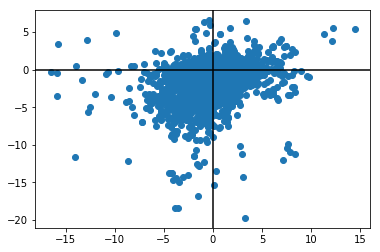

In [53]:
plt.scatter(msgopen['SMmean-1'], msgopen['SMmean0'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [79]:
np.sum((msgopen['SMmean-1']>0) & (msgopen['SMmean0']>0.18) )

293

In [101]:
(msgopen['SMmean0'])[(msgopen['SMmean0']>0)&(msgopen['SMmean-1']>0.4)].shape

(290,)

In [104]:
test = msgopen[(msgopen['SMmean0']>0.2)&(msgopen['SMmean-1']>0.4)]

In [105]:
test

,id,year,month,day,hour,lon,lat,xloc,yloc,area,csize,t,storm_id,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1
207,207,2006,6,24,17,-0.792343,9.654712,578,209,21000,15.0,-72.654995,2,1.277610,0.0,1.0,5.554705,0.0,1.0
215,215,2006,6,26,17,-10.763642,14.077469,225,365,87950,15.0,-82.501805,5,0.882230,0.0,1.0,3.501921,0.0,1.0
234,234,2006,6,29,17,-8.787349,12.890681,293,324,25200,25.0,-79.845151,6,0.478781,0.0,0.0,2.254702,0.0,1.0
235,235,2006,6,29,17,-9.011928,13.154923,285,333,25200,15.0,-86.938956,6,0.371817,0.0,0.0,1.066733,0.0,0.0
236,236,2006,6,29,17,-9.191591,13.286937,279,338,25200,16.0,-80.545582,6,0.288493,0.0,0.0,0.561276,0.0,0.0
238,238,2006,6,29,17,-8.967012,13.989766,288,362,25200,15.0,-72.542053,6,0.438549,0.0,0.0,0.476335,0.0,0.0
241,241,2006,6,30,17,7.741652,10.944612,887,255,31325,15.0,-75.000000,3,3.806061,0.0,1.0,12.154957,0.0,1.0
242,242,2006,6,30,17,7.966231,11.033369,895,258,31325,15.0,-82.044507,3,4.705406,0.0,1.0,11.284389,0.0,1.0
243,243,2006,6,30,17,7.382326,11.343804,873,269,31325,22.0,-80.349328,3,5.372729,0.0,1.0,14.468843,0.0,1.0
244,244,2006,6,30,17,8.011147,11.343804,896,269,31325,16.0,-74.059582,3,5.498231,0.0,1.0,12.229445,0.0,1.0


In [123]:
np.percentile((msgopen['SMmean0'])[(msgopen['SMmean0']<0)&(msgopen['SMmean-1']<-2)], [45])

array([-3.19471506])

In [130]:
(msgopen['SMmean0'][(msgopen['SMmean0']<0)&(msgopen['SMmean-1']<-1)].shape)[0]*0.28

244.44000000000003

In [131]:
np.percentile((msgopen['SMmean0']), [27])

array([-2.78110359])

In [39]:
np.sum(msgopen['SMmean-1']>0.1)/msgopen['SMmean-1'].size

0.37868852459016394

In [47]:
print(np.sum(msgopen['SMmean0']>0.1)/msgopen['SMmean0'].size)
print(np.percentile(msgopen['SMmean0'],[80,10]))


0.2122950819672131
[ 0.18244455 -4.67286792]


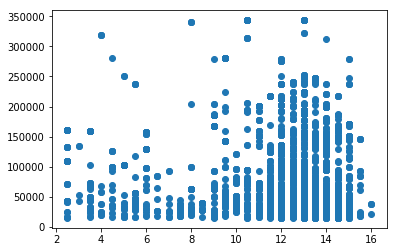

In [34]:
scat = msgopen[(msgopen['initTime'] >= 2) & (msgopen['initTime'] <=17)]
plt.scatter(scat['initTime'], scat['area'])

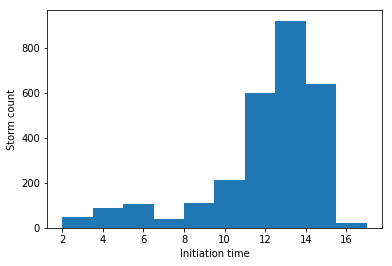

In [35]:
f = plt.figure()
plt.hist(msgopen['initTime'], range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number_new.jpg')

(0, 600)

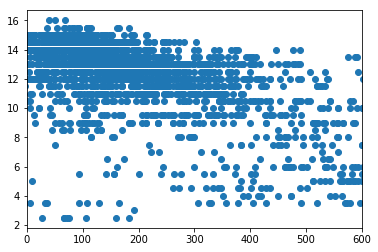

In [44]:
plt.scatter(msgopen['xdiff']*3,msgopen['initTime'])
plt.xlim(0,600)

In [13]:
np.unique(msgopen['initTime'])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 99.9])

In [41]:
msgopen['velocity'] = msgopen['deltaDist']/msgopen['deltaH']

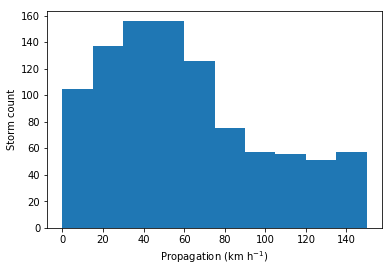

In [42]:
f = plt.figure()
plt.hist(msgopen['velocity'][msgopen['velocity']>0], range=(0,150))
plt.xlabel('Propagation (km h$^{-1}$)')
plt.ylabel('Storm count')
# max around 30-50km per hour. 
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_propagation.jpg')

In [48]:
np.median((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)])

51200.0

In [49]:
np.median((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)])

61562.5

(array([370., 223., 117.,  94.,  78.,  78.,  42.,  24.,  46.,  53.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

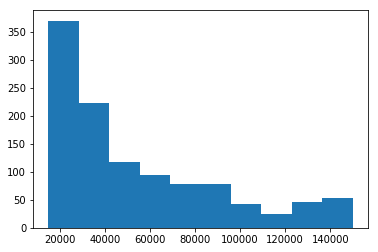

In [55]:
plt.hist((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)], range=(15000,150000), bins=10)

(array([545., 328., 316., 213., 131., 136., 131.,  88., 100.,  73.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

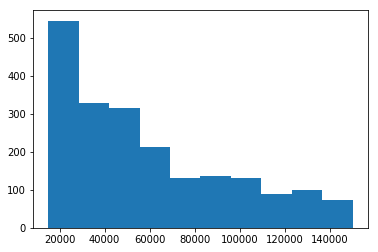

In [56]:
plt.hist((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)], range=(15000,150000), bins=10)

In [92]:
initmsg = msgopen[msgopen['initTime']>=13].copy()

In [114]:
for key in ['storm_id', 'year', 'month', 'day']:
    initmsg[key] = initmsg[key].astype(np.str)

In [117]:
np.unique(initmsg['storm_id'] + initmsg['year'] + initmsg['month'] + initmsg['day']).shape

(455,)

In [118]:
propagationmsg = msgopen[msgopen['initTime']<=6].copy()

In [119]:
for key in ['storm_id', 'year', 'month', 'day']:
    propagationmsg[key] = propagationmsg[key].astype(np.str)

In [120]:
np.unique(propagationmsg['storm_id'] + propagationmsg['year'] + propagationmsg['month'] + propagationmsg['day']).shape

(745,)